#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import warnings
warnings.simplefilter("ignore")

#### Importing the dataset

In [2]:
df=pd.read_csv(r"C:\Users\chine\Downloads\Raw Data\FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding ="latin-1")

In [3]:
df

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...,...,...,...
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04


In [4]:
df.describe().round(2)

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.00,60943.00,60943.00,59354.00,59395.00,59408.00,59437.00,59507.00
mean,134.27,2687.18,3814.86,134.20,135.24,136.56,140.92,143.76
std,72.61,146.06,2212.01,1567.66,1603.40,1640.01,1671.86,1710.78
min,4.00,2501.00,511.00,-1796.00,-3161.00,-3225.00,-1582.00,-3396.00
25%,74.00,2562.00,684.00,0.00,0.00,0.00,0.00,0.00
50%,136.00,2630.00,5142.00,0.09,0.08,0.08,0.10,0.07
75%,195.00,2775.00,5511.00,8.34,8.46,8.43,9.00,9.00
max,276.00,2961.00,5911.00,176405.00,181137.00,185960.00,190873.00,195875.00


### Question 4. What is the mean and standard deviation across the whole dataset for the year 2017 to 2 decimal places?
#### The Answer is mean   = 140.92 and std   = 1671.86

In [5]:
df['Y2017'].agg(['std', 'mean']).round(2)

std     1671.86
mean     140.92
Name: Y2017, dtype: float64

### Question 5 What is the total number and percentage of missing data in 2014 to 3 decimal places?

#### The Answer is 1589 missing data with percentage of 2.607


In [6]:
#To show the total number
df['Y2014'].isnull().sum()

1589

In [7]:
#To show tge percentage 
df['Y2014'].isnull().mean().round(6) *100

2.6074

### Question 7 Which year had the least correlation with ‘Element Code’?

#### Answer is Y2016 with correlation of 0.023	

In [8]:
df.corr()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


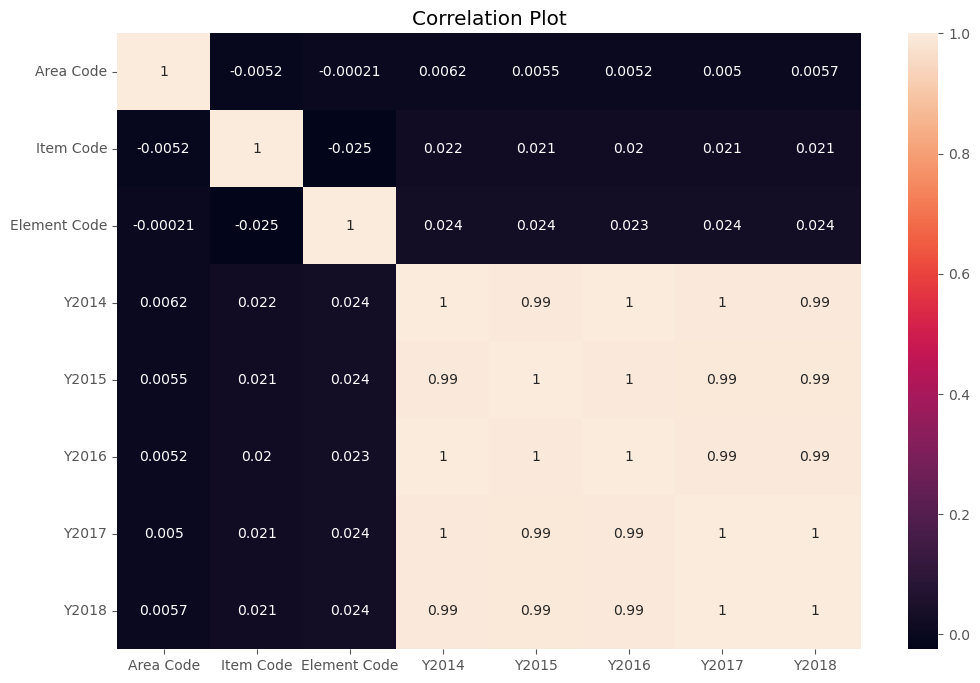

In [9]:
#Plotting a heatmap to show correlation 
correlation_plot = df.corr(method='pearson')
sns.heatmap(correlation_plot, annot = True)
plt.title("Correlation Plot")
plt.show()

### Question 8 Select columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’. Which of these Areas had the 7th lowest sum in 2017?

#### Answer is  Guinea-Bissau	with sum of 19,102.77

In [10]:
pd.DataFrame(df.groupby(['Area'])['Y2017'].sum().sort_values(ascending=True))

,Y2017
Area,
Sudan (former),0.00
Ethiopia PDR,0.00
Comoros,59.84
Seychelles,442.34
Sao Tome and Principe,12662.63
Cabo Verde,14650.74
Guinea-Bissau,19102.77
Lesotho,21267.96
Botswana,22101.30


### Question 11 What is the total Protein supply quantity in Madagascar in 2015?

#### Answer is  173.05

In [11]:
protien_supply=df.groupby (['Element','Area'])['Y2015'].sum()
protien_supply
protien_supply.index
print(protien_supply.xs('Protein supply quantity (g/capita/day)'))
print(protien_supply.xs('Madagascar', level='Area'))

Area
Algeria                        377.37
Angola                         214.15
Benin                          271.97
Botswana                       278.52
Burkina Faso                   317.99
Cabo Verde                     278.41
Cameroon                       291.53
Central African Republic       173.70
Chad                           252.28
Congo                          227.08
Côte d'Ivoire                  232.59
Djibouti                       269.59
Egypt                          394.87
Eswatini                       237.71
Ethiopia                       259.82
Gabon                          345.41
Gambia                         257.67
Ghana                          241.71
Guinea                         227.46
Guinea-Bissau                  168.61
Kenya                          251.73
Lesotho                        254.50
Liberia                        159.43
Madagascar                     173.05
Malawi                         272.49
Mali                           319.85
Maurita

### Question 14 
### Answer the following questions based on the African food production dataset provided by the FAO website already provided. What is the total sum of Wine produced in 2015 and 2018 respectively? Hint: Perform a groupby sum aggregation on ‘Item’


### The Answer is 4251.81 and  4039.32 for 2015 and 2018 respectively


In [12]:
df.groupby('Item')['Y2015', 'Y2018'].sum()

,Y2015,Y2018
Item,,
"Alcohol, Non-Food",2180.00,2293.00
Alcoholic Beverages,98783.72,97847.27
Animal Products,11811.73,11578.61
Animal fats,200675.72,269648.27
Apples and products,10559.15,9640.51
...,...,...
"Vegetables, Other",158104.08,163987.21
Vegetal Products,107064.17,107775.39
Wheat and products,234710.51,242645.19


### Question 15. Perform a groupby operation on ‘Element’. What is the total number of the sum of Processing in 2017?


### The answer is 292,836.00


In [13]:
df.groupby('Element')['Y2017',].sum()

,Y2017
Element,
Domestic supply quantity,2088198.10
Export Quantity,182338.80
Fat supply quantity (g/capita/day),10253.84
Feed,223705.68
Food,1258888.28
Food supply (kcal/capita/day),454681.00
Food supply quantity (kg/capita/yr),48690.04
Import Quantity,294559.09
Losses,160614.00


### Question 16. Perform a groupby operation on ‘Element’. What year has the highest sum of Stock Variation?



### The Answer is  Y2014 with sum of stock Variation of 58,749.83


In [14]:
df.groupby('Element')['Y2014', 'Y2016', 'Y2017', 'Y2018'].sum()

,Y2014,Y2016,Y2017,Y2018
Element,,,,
Domestic supply quantity,1996716.35,2044842.70,2088198.10,2161192.10
Export Quantity,150020.64,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),10225.56,10102.77,10253.84,10258.69
Feed,216927.89,228958.65,223705.68,233489.68
Food,1212332.49,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),454257.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),49650.63,48985.28,48690.04,49056.85
Import Quantity,274144.48,286582.78,294559.09,287997.09
Losses,153223.00,157787.00,160614.00,163902.00


### Question 17. What is the total number of unique countries in the dataset?

#### The Answer is 49


In [15]:
df['Area'].nunique()

49

### Question 19: Select columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’. Which of these Areas had the highest sum in 2017?

### Answer is Nigeria	with sum of 1,483,268.23

In [16]:
pd.DataFrame(df.groupby(['Area'])['Y2017'].sum().sort_values(ascending = False))

,Y2017
Area,
Nigeria,1483268.23
Egypt,866379.92
South Africa,517590.54
Ethiopia,448683.76
Morocco,388495.36
Ghana,337599.06
Algeria,325644.27
United Republic of Tanzania,322616.85
Kenya,264660.66
